In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the datasets
df = pd.read_csv("/content/Unemployment datasets.zip")


In [3]:
print(df.head())
print(df.columns)
print(df.isnull().sum())  # Check missing values

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
     

In [4]:
# Clean column names
df.columns = df.columns.str.strip()

In [5]:
# Drop rows with missing Date or Unemployment Rate
df = df.dropna(subset=["Date", "Estimated Unemployment Rate (%)"])

In [6]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [7]:
# Sort by date
df = df.sort_values(by='Date')

In [8]:
# 📈 Plot 1: National Unemployment Rate Over Time (Average across regions)
national_trend = df.groupby('Date')["Estimated Unemployment Rate (%)"].mean()

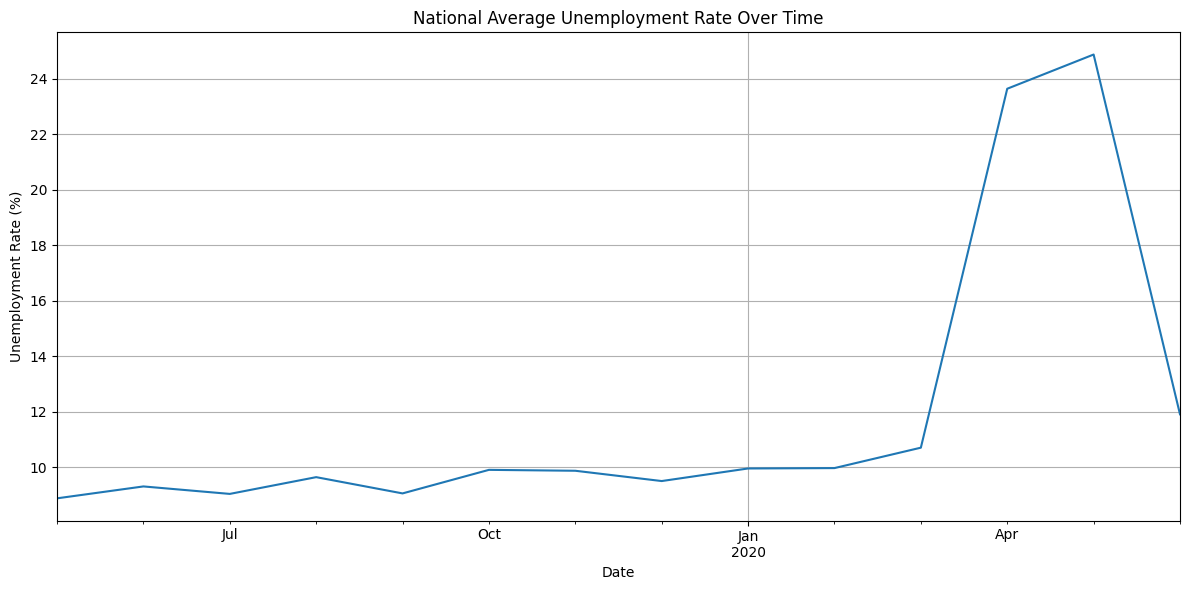

In [9]:
plt.figure(figsize=(12,6))
national_trend.plot()
plt.title("National Average Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# 📊 Plot 2: Average Unemployment by Month
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')["Estimated Unemployment Rate (%)"].mean()

/tmp/ipython-input-2681201646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='Blues')


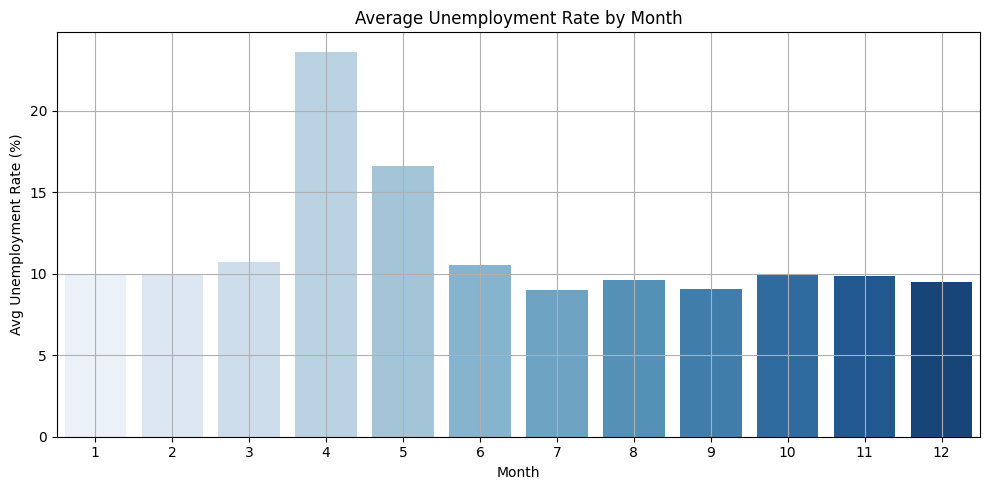

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='Blues')
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Avg Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# 📉 Plot 3: Covid-19 Impact (Compare 2019 vs 2020)
df['Year'] = df['Date'].dt.year
covid_compare = df[df['Year'].isin([2019, 2020])]
compare_avg = covid_compare.groupby(['Year', 'Month'])["Estimated Unemployment Rate (%)"].mean().unstack(0)

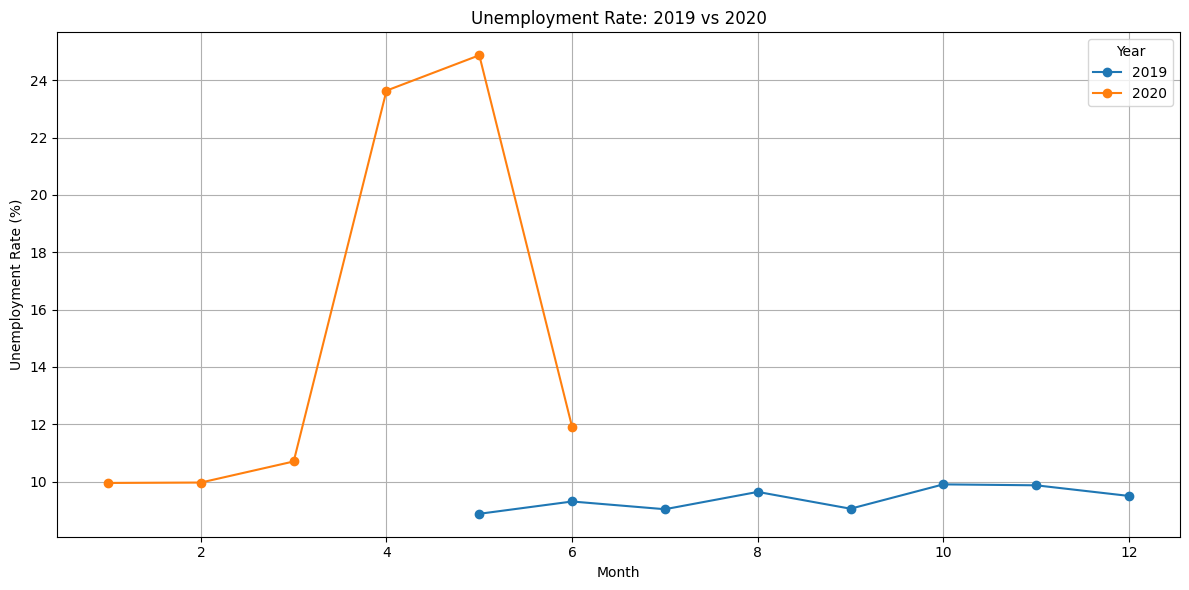

In [13]:
compare_avg.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Unemployment Rate: 2019 vs 2020")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualizations:
1.Line graph of unemployment over time

2.Monthly average bar plot

3.2019 vs 2020 comparison line graph

# Conclusion:
The data reflects how external events like Covid-19 cause sharp labor market shifts. Such analysis helps inform better employment policies and early intervention strategies.